# Trabalho - Introdução a Python
## Análise dos tweets do ex-presidente Lula e presidente Bolsonaro
### Aluno: João Manoel Lins - 1924520/9

#### Copyright (c) 2019 João Manoel Lins.

----

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud 

# misc
from tqdm.auto import tqdm
tqdm.pandas()

import os
import string
import re

%matplotlib inline

print(f'Datasets: {os.listdir("./datasets")}\n\n')
print(f'Arquivos no diretório: {os.listdir()}')

Datasets: ['jairbolsonaro.json', 'LulaOficial.json']


Arquivos no diretório: ['.DS_Store', 'LICENSE', 'requirements.txt', 'datasets', 'stopwords.csv', 'README.md', 'env', '.gitignore', '.ipynb_checkpoints', 'python_analysis_unifor.ipynb', '.git']


/Users/joaomanoellins/Documents/Programming/mba_ds/twitter_analysis/env/lib/python3.7/site-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


## Funções Auxiliares

In [2]:
def plot_tweets(x, y1, y2, title, legend, xlabel, ylabel='Quantidade', figsize=(14, 6)):
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot(x, y1, 'b-', x, y2, 'r-')
    
    # Format Figure
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xticks(x)
    plt.legend(legend)
        
    ax.grid(True)

In [3]:
def remove_stop_words_punctuation(df):
    return df.progress_apply(lambda x: ' '.join([w for w in x.split() if w.lower() not in sw.values and w.lower() not in string.punctuation]))

def remove_stop_words(df):
    return df.progress_apply(lambda x: ' '.join([w for w in x.split() if w.lower() not in sw.values]))

def remove_punctuation(df):
    return df.progress_apply(lambda x: ' '.join([w for w in x.split() if w not in string.punctuation]))

In [4]:
def words_counter(words):
    return words.progress_apply(lambda x: len([w for w in x.split()]))

def letter_counter(words):
    return words.progress_apply(lambda x: len(x))

def unique_words_counter(words):
    return words.apply(lambda x: len(set([w for w in x.split()])))

def unique_letter_counter(words):
    return words.progress_apply(lambda x: len(set(x)))

def punctuation_counter(words):
    return words.progress_apply(lambda x: len([w for w in x if w in string.punctuation]))

def space_counter(words):
    return words.apply(lambda x: len([w for w in x if w == ' ']))

def stop_words_counter(words):
    return words.progress_apply(lambda x: len([w for w in x if w in sw.values]))

def long_words_counter(words):
    return words.progress_apply(lambda x: len([w for w in x.split() if len(w) >= 7]))

def short_words_counter(words):
    return words.apply(lambda x: len([w for w in x.split() if len(w) <= 3]))

def total_words_counter(tweets):
    translation_table = str.maketrans(dict.fromkeys(string.punctuation))
    counter = {}
    for tweet in tweets:
        for word in tweet.lower().split():
            if word not in sw.values:
                nWord = word.translate(translation_table) # Remove the punctuation
                if nWord != '':
                    try:
                        counter[nWord] += 1
                    except:
                        counter[nWord] = 1
    return counter

In [5]:
def hashtag_counter(hashtags):
    counter = {}
    for hastag in hashtags:
        try:
            counter[hastag] += 1
        except:
            counter[hastag] = 1
    return counter

In [6]:
def generate_word_cloud(text):
    # Word Cloud
    wordcloud = WordCloud(max_font_size=50, max_words=10, background_color="white").generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

In [7]:
def source_counter(sources):
    counter = {}
    for source in sources:
        try:
            counter[source] += 1
        except:
            counter[source] = 1
    return counter

## Importando os tweets de cada um em Dataframes

In [8]:
bolsonaro_df = pd.read_json('./datasets/jairbolsonaro.json', convert_dates=True)
lula_df = pd.read_json('./datasets/LulaOficial.json', convert_dates=True)

## Stop Words

In [9]:
# Stop Words
sw = pd.read_csv('stopwords.csv').iloc[:, 0]

## Analisando 5 tweets

In [10]:
bolsonaro_df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,lang,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2010-04-01 02:59:50+00:00,11402700435,11402700435,"EM ""DITADURA"" SEM PAREDÃO, ATÉ CHICO ALENCAR É...",False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://about.twitter.com/products/tw...",NaN,NaN,...,15,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-01-10 11:02:23+00:00,1083318129135112192,1083318129135112192,"Bom dia! 🇧🇷 #tbt com o amigo ""Canguru"", que já...",False,"[0, 90]","{'hashtags': [{'text': 'tbt', 'indices': [12, ...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,31618,False,False,pt,"{'media': [{'id': 1083318121841262592, 'id_str...",0.0,NaN,NaN,NaN,NaN
2,2019-07-19 02:04:16+00:00,1152036400138579968,1152036400138579968,- Para descontrair. Proibido queimar ovo. (Kkk...,False,"[0, 48]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,...,46637,False,False,pt,"{'media': [{'id': 1152036204247953408, 'id_str...",0.0,NaN,NaN,NaN,NaN
3,2018-10-09 02:52:56+00:00,1049492883328380928,1049492883328380928,Trecho de entrevista ao vivo para o Jornal Nac...,False,"[0, 65]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,56322,False,False,pt,"{'media': [{'id': 1049489244387983360, 'id_str...",0.0,NaN,NaN,NaN,NaN
4,2017-08-23 15:12:48+00:00,900375277557215232,900375277557215232,Querem criar o fundão bilionário na Reforma Po...,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,7147,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
lula_df.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,source,in_reply_to_status_id,in_reply_to_status_id_str,...,favorite_count,favorited,retweeted,lang,extended_entities,possibly_sensitive,quoted_status_id,quoted_status_id_str,quoted_status_permalink,quoted_status
0,2018-08-17 16:23:04+00:00,1030490201460801541,1030490201460801536,"""O presidente Lula vai dar um passeio nessa el...",False,"[0, 212]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,...,347,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN
1,2014-09-16 01:53:02+00:00,511694215735422976,511694215735422976,@dilmabr afirma que aqueles que querem acabar ...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,...,9,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-08-08 23:23:49+00:00,895063025996242944,895063025996242944,O PT deu cidadania para as mulheres fazerem po...,False,"[0, 95]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,NaN,...,203,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-10-18 11:24:23+00:00,920611514071076865,920611514071076864,Continuo sendo o lulinha paz e a amor. A gente...,False,"[0, 108]","{'hashtags': [{'text': 'LulanoRadio', 'indices...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,...,153,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-04-24 22:24:18+00:00,856634932764037120,856634932764037120,"Olhando as últimas pesquisas, vemos que a únic...",False,"[0, 100]","{'hashtags': [], 'symbols': [], 'user_mentions...","<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,NaN,...,168,False,False,pt,NaN,NaN,NaN,NaN,NaN,NaN


## Analisando a forma
### Quantidade de linhas e colunas
#### linhas -> Quantidade de tweets
#### colunas -> Quantidade de atributos

In [12]:
bolsonaro_df.shape

(6794, 30)

In [13]:
lula_df.shape

(14961, 30)

Ambos possuem 30 campos. 

**Lula possui mais que o dobro de tweets em comparação com Bolsonaro.**

## Removendo campos desnecessários

In [14]:
label_to_remove = [
    'id', 'id_str', 'truncated', 'display_text_range', 'extended_entities',
    'quoted_status_id', 'quoted_status_id_str', 'quoted_status_permalink',
    'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id',
    'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'geo', 'coordinates',
    'place', 'contributors', 'is_quote_status', 'favorited', 'retweeted',
    'possibly_sensitive', 'lang', 'quoted_status'
]

bolsonaro_df.drop(labels=label_to_remove, axis=1, inplace=True)
lula_df.drop(labels=label_to_remove, axis=1, inplace=True)

# Os horários dos Tweets estão no horário UTC.. Convertendo para fuso horário brasileiro
bolsonaro_df['created_at'] = bolsonaro_df['created_at'].dt.tz_convert(tz='America/Sao_Paulo')
lula_df['created_at'] = lula_df['created_at'].dt.tz_convert(tz='America/Sao_Paulo')

# Removendo as tags do source
bolsonaro_df['source'] = bolsonaro_df['source'].apply(lambda x: re.sub('<.*?>', '', x))
lula_df['source'] = lula_df['source'].apply(lambda x: re.sub('<.*?>', '', x))

# Checando o horário
# Notar que o horário vai sair com "-3" de offset
# Brasil/São_Paulo está 3 horas atrás do horário UTC. UTC-3
print(bolsonaro_df['created_at'][0])

2010-03-31 23:59:50-03:00


## Dataframe depois da limpeza

In [15]:
bolsonaro_df.tail()

,created_at,full_text,entities,source,user,retweet_count,favorite_count
6789,2019-09-17 13:39:08-03:00,Menos burocratização e gastos ao brasileiro: a...,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,"{'id': 128372940, 'id_str': '128372940', 'name...",6264,46305
6790,2016-02-20 10:32:40-02:00,A @RevistaEpoca mente DESCARADAMENTE a meu res...,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,"{'id': 128372940, 'id_str': '128372940', 'name...",452,893
6791,2019-01-07 13:22:55-02:00,Foi realizada hoje a Cerimônia de Posse dos Pr...,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,"{'id': 128372940, 'id_str': '128372940', 'name...",5082,42443
6792,2019-10-16 08:27:36-03:00,- O Estatuto do Desarmamento ainda está em vig...,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter for iPhone,"{'id': 128372940, 'id_str': '128372940', 'name...",5744,34029
6793,2014-07-15 11:17:27-03:00,Discurso d @FlavioBolsonaro sobre maioridade p...,"{'hashtags': [], 'symbols': [], 'user_mentions...",Twitter Web Client,"{'id': 128372940, 'id_str': '128372940', 'name...",18,12


Bem menos campos e mais limpo :)

## Checando por campos nulos

In [16]:
bolsonaro_df.isnull().mean() * 100

created_at        0.0
full_text         0.0
entities          0.0
source            0.0
user              0.0
retweet_count     0.0
favorite_count    0.0
dtype: float64

In [17]:
lula_df.isnull().mean() * 100

created_at        0.0
full_text         0.0
entities          0.0
source            0.0
user              0.0
retweet_count     0.0
favorite_count    0.0
dtype: float64

**Nenhum dos dois dataframes possuem campos nulos.**

## O primeiro tweet

In [18]:
bolsonaro_firstTweet = bolsonaro_df.iloc[bolsonaro_df['created_at'].idxmin()]
lula_firstTweet = lula_df.iloc[lula_df['created_at'].idxmin()]

print(f'Bolsonaro: \n Tweet: {bolsonaro_firstTweet["full_text"]}\n Data: {bolsonaro_firstTweet["created_at"]}')
print('\n')
print(f'Lula: \n Tweet: {lula_firstTweet["full_text"]}\n Data: {lula_firstTweet["created_at"]}')

Bolsonaro: 
 Tweet: Boa noite a todos @depchicolanecar @reportercrime
 Data: 2010-03-31 22:33:17-03:00


Lula: 
 Tweet: Lula acaba de chegar ao @smabc de onde começará caminhada junto com @dilmabr #LulaeDilmanoABC
 Data: 2014-09-02 12:09:51-03:00


# Maior e menor tweet
### Quantidade de palavras e letras

## Quantidade de palavras

In [19]:
bolsonaro_words_count = words_counter(bolsonaro_df['full_text']).sort_values(ascending=False)
lula_words_count = words_counter(lula_df['full_text']).sort_values(ascending=False)

bolsonaro_min_tweet_len = bolsonaro_words_count.iloc[-1]
bolsonaro_max_tweet_len = bolsonaro_words_count.iloc[0]
bolsonaro_min_tweet = bolsonaro_df.iloc[bolsonaro_words_count.idxmin()]
bolsonaro_max_tweet = bolsonaro_df.iloc[bolsonaro_words_count.idxmax()]

lula_min_tweet_len = lula_words_count.iloc[-1]
lula_max_tweet_len = lula_words_count.iloc[0]
lula_min_tweet = lula_df.iloc[lula_words_count.idxmin()]
lula_max_tweet = lula_df.iloc[lula_words_count.idxmax()]

print("Bolsonaro\n")
print(f"Menor quantidade de palavras: \t{bolsonaro_min_tweet_len}")
print(f"Tweet: {bolsonaro_min_tweet['full_text']}")
print(f"{bolsonaro_min_tweet['created_at']}\n\n")

print(f"Maior quantidade de palavras: \t{bolsonaro_max_tweet_len}")
print(f"Tweet: {bolsonaro_max_tweet['full_text']}")
print(f"{bolsonaro_max_tweet['created_at']}")

print('\n')

print("Lula\n")
print(f"Menor quantidade de palavras: \t{lula_min_tweet_len}")
print(f"Tweet: {lula_min_tweet['full_text']}")
print(f"{lula_min_tweet['created_at']}\n\n")


print(f"Maior quantidade de palavras: \t{lula_max_tweet_len}")
print(f"Tweet: {lula_max_tweet['full_text']}")
print(f"{lula_max_tweet['created_at']}")


Bolsonaro

Menor quantidade de palavras: 	1
Tweet: https://t.co/PxuX2Xp0Ma
2019-03-08 13:08:26-03:00


Maior quantidade de palavras: 	57
Tweet: O Brasil de todas as religiões sabe que a liberdade é o bem maior de um povo. Brasileiro, olhe o que Israel não tem e o que eles são. Veja o que nós no Brasil temos, e o que não somos. Juntos, com fé, muito trabalho e oração, colocaremos nossa Pátria no local destaque que merece. https://t.co/fBuL3xk5Qg
2019-06-01 10:06:48-03:00


Lula

Menor quantidade de palavras: 	1
Tweet: https://t.co/s68PfAWGuY
2018-04-25 14:55:23-03:00


Maior quantidade de palavras: 	57
Tweet: "Você acha normal uma Polícia Federal, que vai na minha casa, vai na casa dos meus netos e pega um tablet de um moleque de 4 anos de idade? E ficaram um ano com ele aqui preso e não tiveram coragem de pegar o telefone do Eduardo Cunha porque o Moro falou "não pega o telefone". https://t.co/oOId43hE8a
2019-08-19 10:18:58-03:00


## Quantidade de letras

In [20]:
bolsonaro_letter_count = letter_counter(bolsonaro_df['full_text']).sort_values(ascending=False)
lula_letter_count = letter_counter(lula_df['full_text']).sort_values(ascending=False)

bolsonaro_min_tweet_len = bolsonaro_letter_count.iloc[-1]
bolsonaro_max_tweet_len = bolsonaro_letter_count.iloc[0]
bolsonaro_min_tweet = bolsonaro_df.iloc[bolsonaro_letter_count.idxmin()]
bolsonaro_max_tweet = bolsonaro_df.iloc[bolsonaro_letter_count.idxmax()]

lula_min_tweet_len = lula_letter_count.iloc[-1]
lula_max_tweet_len = lula_letter_count.iloc[0]
lula_min_tweet = lula_df.iloc[lula_letter_count.idxmin()]
lula_max_tweet = lula_df.iloc[lula_letter_count.idxmax()]

print("Bolsonaro\n")
print(f"Menor quantidade de letras: \t{bolsonaro_min_tweet_len}")
print(f"Tweet: {bolsonaro_min_tweet['full_text']}")
print(f"{bolsonaro_min_tweet['created_at']}\n\n")

print(f"Maior quantidade de letras: \t{bolsonaro_max_tweet_len}")
print(f"Tweet: {bolsonaro_max_tweet['full_text']}")
print(f"{bolsonaro_min_tweet['created_at']}")

print('\n')

print("Lula\n")
print(f"Menor quantidade de letras: \t{lula_min_tweet_len}")
print(f"Tweet: {lula_min_tweet['full_text']}")
print(f"{lula_min_tweet['created_at']}\n\n")

print(f"Maior quantidade de letras: \t{lula_max_tweet_len}")
print(f"Tweet: {lula_max_tweet['full_text']}")
print(f"{lula_max_tweet['created_at']}\n\n")



Bolsonaro

Menor quantidade de letras: 	1
Tweet: 👍
2019-05-30 21:21:47-03:00


Maior quantidade de letras: 	332
Tweet: @CazanovaGisele @joicehasselmann @JanainaDoBrasil @kimpkat Senhor Paulo Cazanova, agradeço imensamente o seu apoio e reafirmo aqui o compromisso de levar adiante toda esperança depositada em nosso governo para que possamos dar aos nossos filhos e netos um futuro melhor. Que Deus abençoe você e toda sua família! Um forte abraço! 🇧🇷
2019-05-30 21:21:47-03:00


Lula

Menor quantidade de letras: 	11
Tweet: 1989 #Globo
2017-05-11 21:27:18-03:00


Maior quantidade de letras: 	304
Tweet: "O mundo precisa de paz para se desenvolver, para crescer economicamente e melhorar a vida do povo" 
Lula, junto com a Turquia, fechou um acordo contra armas nucleares no Irã em 2010 muito antes desse dos EUA, que Trump quebra unilateralmente, aumentando a tensão no Oriente Médio https://t.co/1wdHUJmJ77
2018-05-15 16:42:52-03:00




## Quantidade de tweets por ano

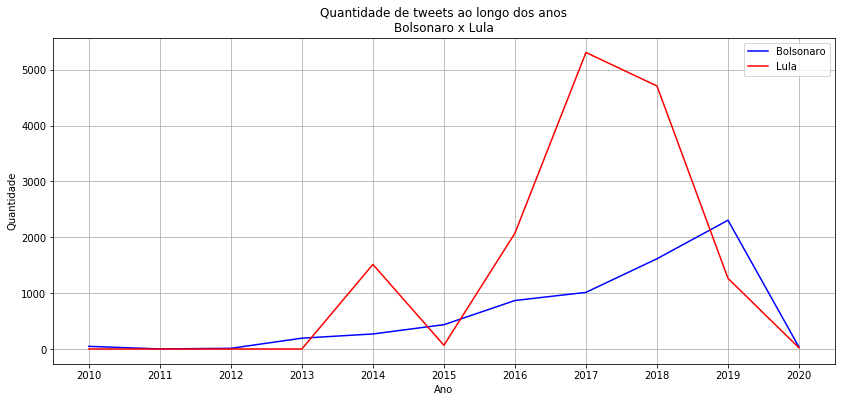

In [21]:
bolsonaro_tweets_by_year = pd.to_datetime(bolsonaro_df['created_at']).dt.year.value_counts().sort_index()
lula_tweets_by_year = pd.to_datetime(lula_df['created_at']).dt.year.value_counts().sort_index()

years = bolsonaro_tweets_by_year.index if bolsonaro_tweets_by_year.size > lula_tweets_by_year.size else lula_tweets_by_year.index
for year in years:
    if year not in lula_tweets_by_year:
        lula_tweets_by_year[year] = 0
    if year not in bolsonaro_tweets_by_year:
        bolsonaro_tweets_by_year[year] = 0

lula_tweets_by_year = lula_tweets_by_year.sort_index()

plot_tweets(
    years, 
    bolsonaro_tweets_by_year.values,
    lula_tweets_by_year.values,
    'Quantidade de tweets ao longo dos anos\nBolsonaro x Lula',
    ['Bolsonaro', 'Lula'],
    'Ano'
)

## Quantidade de tweets a cada mês do ano

/Users/joaomanoellins/Documents/Programming/mba_ds/twitter_analysis/env/lib/python3.7/site-packages/pandas/core/arrays/datetimes.py:1269: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  UserWarning,


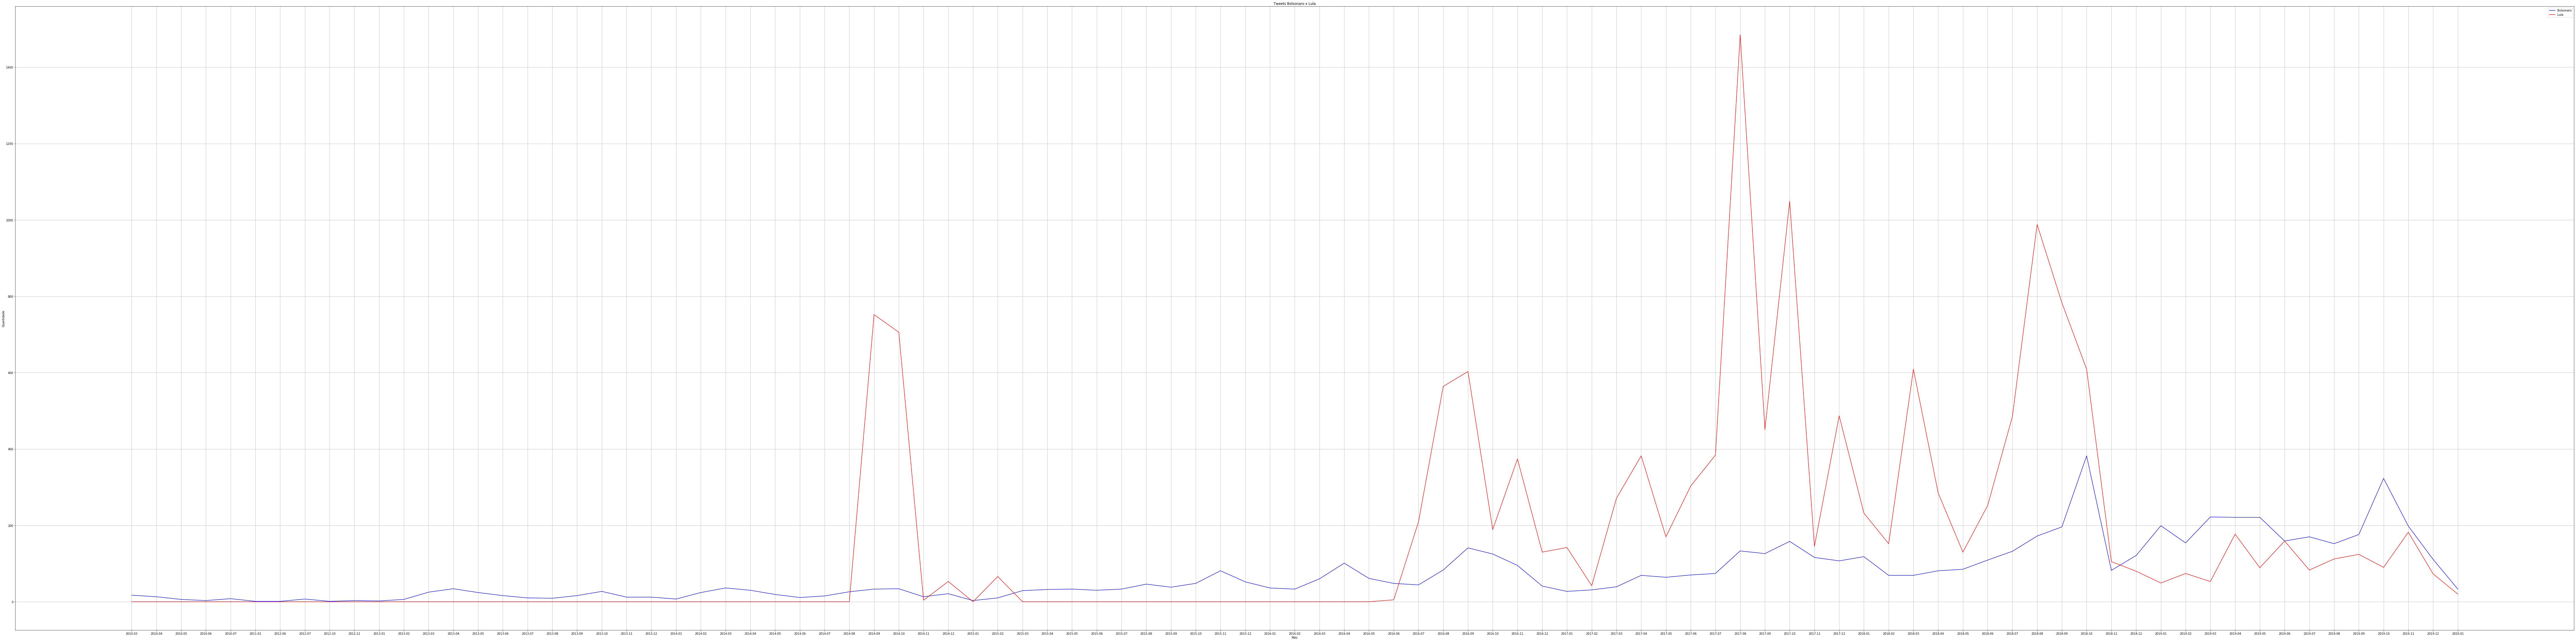

In [22]:
bolsonaro_tweets_by_mon = pd.to_datetime(bolsonaro_df['created_at']).dt.to_period('M').astype(str).value_counts().sort_index()
lula_tweets_by_mon = pd.to_datetime(lula_df['created_at']).dt.to_period('M').astype(str).value_counts().sort_index()

months = bolsonaro_tweets_by_mon.index if bolsonaro_tweets_by_mon.size > lula_tweets_by_mon.size else lula_tweets_by_mon.index
for mon in months:
    if mon not in lula_tweets_by_mon:
        lula_tweets_by_mon[mon] = 0

lula_tweets_by_mon = lula_tweets_by_mon.sort_index()
plot_tweets(
    months, 
    bolsonaro_tweets_by_mon.values,
    lula_tweets_by_mon.values,
    'Tweets Bolsonaro x Lula',
    ['Bolsonaro', 'Lula'],
    'Mês',
    figsize=(160, 40)
)

## Os 15 dias com mais quantidade de tweets

In [23]:
bolsonaro_top_tweets_by_day = pd.to_datetime(bolsonaro_df['created_at']).dt.to_period('D').value_counts().sort_values(ascending=False)[:15]
lula_top_tweets_by_day = pd.to_datetime(lula_df['created_at']).dt.to_period('D').value_counts().sort_values(ascending=False)[:15]

print('Maior quantidade de tweets por dia - TOP 15\n\n')
print('Bolsonaro\n')
print('Data\t\t\t\t Quantidade Tweets')
for day, qty in bolsonaro_top_tweets_by_day.items():
    print(f"{day.strftime('%d/%m/%Y')}\t\t\t\t {qty}")

####################
print('\n\n')
####################
print('Lula\n')
print('Data\t\t\t\tQuantidade Tweets')
for day, qty in lula_top_tweets_by_day.items():
    print(f"{day.strftime('%d/%m/%Y')}\t\t\t\t {qty}")

Maior quantidade de tweets por dia - TOP 15


Bolsonaro

Data				 Quantidade Tweets
14/11/2015				 40
03/11/2019				 39
27/10/2019				 35
10/11/2019				 34
20/10/2019				 32
13/10/2019				 25
26/10/2018				 23
09/11/2016				 22
18/10/2018				 22
16/10/2018				 21
30/09/2018				 20
27/10/2018				 19
31/08/2016				 19
06/10/2018				 19
21/10/2018				 19



Lula

Data				Quantidade Tweets
25/08/2017				 165
25/10/2017				 162
27/08/2017				 157
21/09/2016				 148
21/08/2017				 131
18/08/2017				 127
02/08/2016				 115
28/10/2017				 114
13/07/2016				 112
26/10/2017				 108
22/09/2016				 108
24/10/2017				 101
30/08/2017				 98
20/07/2017				 98
16/10/2014				 95


## Palavras mais utilizadas no dia com mais tweets
### A ideia é saber o resumo do que foi falado utilizando um nuvem de palavras

#### Foi utilizado o dia que cada um mais tweetou. As palavras foram contadas levando todos os tweets do dia, e por final, as 5 palavras mais utilizadas foram separadas paraa nuvem de palavras.


Bolsonaro Word Cloud:


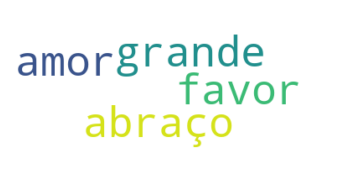




Lula Word Cloud:


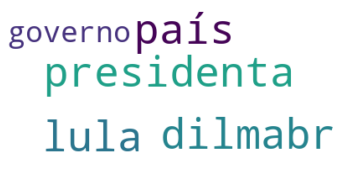

In [24]:
bolsonaro_top_day = str(bolsonaro_top_tweets_by_day.index[0])
lula_top_day = str(lula_top_tweets_by_day.index[0])

bolsonaro_top_day_tweets = remove_stop_words_punctuation(bolsonaro_df[bolsonaro_df['created_at'].dt.date.astype('str') == bolsonaro_top_day]['full_text'])
lula_top_day_tweets = remove_stop_words_punctuation(lula_df[lula_df['created_at'].dt.date.astype('str') == lula_top_day]['full_text'])

bolsonaro_top_words = pd.DataFrame(data=list(total_words_counter(bolsonaro_top_day_tweets).items()), columns=['Word', 'Count']).sort_values(by='Count', ascending=False)[:5]
lula_top_words = pd.DataFrame(data=list(total_words_counter(lula_top_day_tweets).items()), columns=['Word', 'Count']).sort_values(by='Count', ascending=False)[:5]

print('Bolsonaro Word Cloud:')
generate_word_cloud(' '.join(bolsonaro_top_words['Word']))

print('\n\n')

print('Lula Word Cloud:')
generate_word_cloud(' '.join(lula_top_words['Word']))

Fazendo uma análises nos tweets, conclui que:

Bolsonaro tirou o dia para responder vários tweets de pessoas, ou seja, ficou interagindo com as pessoas.

Lula estava no período de caravana pelo Brasil. Nessa época, ele visitou as cidades de Recife e Ipojuca, ambas no Pernambuco. A agenda foi cheia. Lula fez comício nas duas cidades, deu entrevista para uma mídia independente. Dilma também estava presente. A equipe que cuida das redes sociais fez vários tweets com frases usadas por Lula e Dilma durante o comício. Teve transmissão ao vivo pelo Facebook.

## Horário com mais frequência de tweets

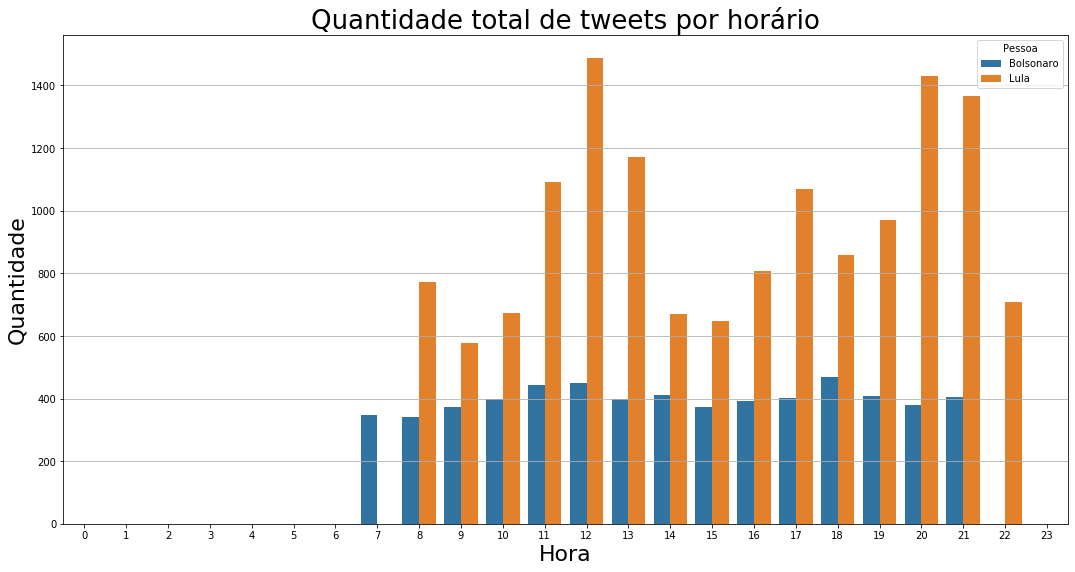

In [25]:
def plot_bar(data):
    fig, ax = plt.subplots(figsize=(18,9))
    ax.set_title('Quantidade total de tweets por horário', fontsize=26)
    ax.set_xlabel("Hora", fontsize=22)
    ax.set_ylabel("Quantidade", fontsize=22)
    ax.grid(True)
    sns.barplot(x='Hora', y='Quantidade', hue='Pessoa', data=data, ax=ax)
    

bolsonaro_tweets_by_hour = pd.to_datetime(bolsonaro_df['created_at']).dt.hour.value_counts().sort_values(ascending=False)[:15]
lula_tweets_by_hour = pd.to_datetime(lula_df['created_at']).dt.hour.value_counts().sort_values(ascending=False)[:15]

tweets_by_hour = {
    'Bolsonaro': bolsonaro_tweets_by_hour,
    'Lula': lula_tweets_by_hour
}

d = {
    'Pessoa': [],
    'Hora': [],
    'Quantidade': []
}

# 0 to 23 hours
for i in range(0, 24):
    for p in tweets_by_hour.keys():
        d['Pessoa'].append(p)
        d['Hora'].append(i)

        try:
            q = tweets_by_hour[p][i]
            d['Quantidade'].append(q)
        except:
            d['Quantidade'].append(0)

plot_bar(pd.DataFrame.from_dict(d))

## Dia da semana com mais frequência de tweets

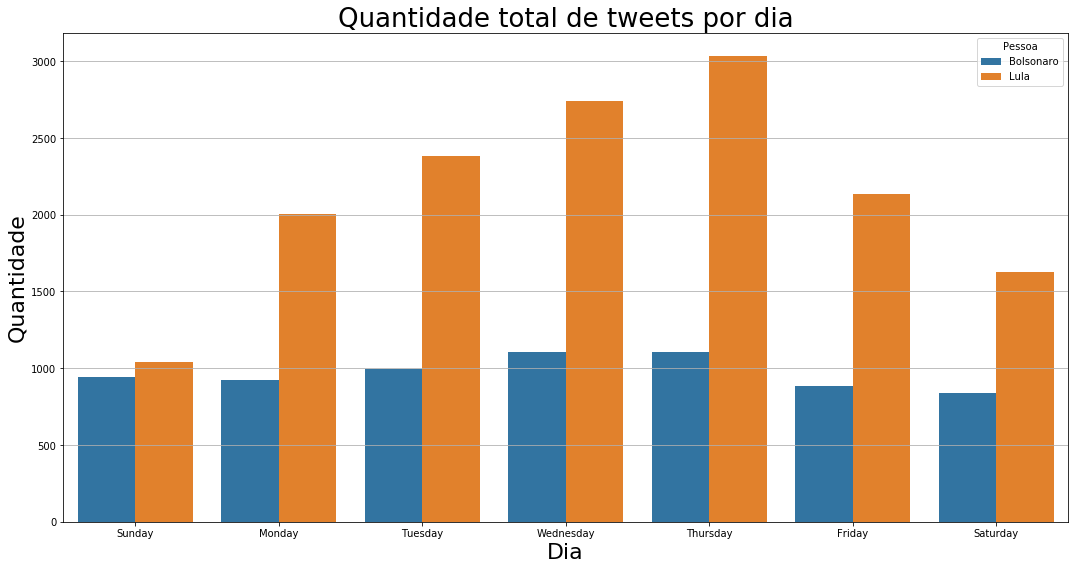

In [26]:
def plot_bar(data):
    fig, ax = plt.subplots(figsize=(18,9))
    ax.set_title('Quantidade total de tweets por dia', fontsize=26)
    ax.set_xlabel("Dia", fontsize=22)
    ax.set_ylabel("Quantidade", fontsize=22)
    ax.grid(True)
    sns.barplot(x='Dia', y='Quantidade', hue='Pessoa', data=data, ax=ax)
    

bolsonaro_tweets_by_day = pd.to_datetime(bolsonaro_df['created_at']).dt.weekday_name.value_counts().sort_values(ascending=False)[:15]
lula_tweets_by_day = pd.to_datetime(lula_df['created_at']).dt.weekday_name.value_counts().sort_values(ascending=False)[:15]

tweets_by_hour = {
    'Bolsonaro': bolsonaro_tweets_by_day,
    'Lula': lula_tweets_by_day
}

d = {
    'Pessoa': [],
    'Dia': [],
    'Quantidade': []
}

# days
for i in ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']:
    for p in tweets_by_hour.keys():
        d['Pessoa'].append(p)
        d['Dia'].append(i)

        try:
            q = tweets_by_hour[p][i]
            d['Quantidade'].append(q)
        except:
            d['Quantidade'].append(0)

plot_bar(pd.DataFrame.from_dict(d))


## Análise das hashtags

In [27]:
def hashtag_gen(df):
    tweets_with_hashtags = 0
    hashtags = []
    
    for entity in df['entities']:
        for hashtag in entity['hashtags']:
            tweets_with_hashtags += 1
            hashtags.append('#' + hashtag['text'])
    return tweets_with_hashtags, hashtags

bolsonaro_tweet_with_hashtags, bolsonaro_hashtags = hashtag_gen(bolsonaro_df)
bolsonaro_hashtags = pd.DataFrame(data=list(hashtag_counter(bolsonaro_hashtags).items()), columns=['hashtag', 'count']).sort_values(by='count', ascending=False)

lula_tweet_with_hashtags, lula_hashtags = hashtag_gen(lula_df)
lula_hashtags = pd.DataFrame(data=list(hashtag_counter(lula_hashtags).items()), columns=['hashtag', 'count']).sort_values(by='count', ascending=False)[:5]

# Hashtag com pelo menos 10
print('As 5 hashtags mais utilizadas\n')
print('Bolsonaro\n')

for index, row in bolsonaro_hashtags[:5].iterrows():
    print(f"{row['hashtag']}\t {row['count']} vezes")
    
print('\n\n')
print('Lula\n')

for index, row in lula_hashtags[:5].iterrows():
    print(f"{row['hashtag']}\t {row['count']} vezes")

As 5 hashtags mais utilizadas

Bolsonaro

#debate64	 15 vezes
#choramais	 10 vezes
#fakenews	 4 vezes
#NasRuasComBolsonaro	 4 vezes
#FORAPT	 3 vezes



Lula

#LulaPeloBrasil	 1160 vezes
#LulaLivre	 448 vezes
#LulaPorMinasGerais	 447 vezes
#LulaLivreJá	 304 vezes
#LulaporSP	 291 vezes


## Porcentagem de tweets com hashtag

In [28]:
print(f"Bolsonaro: {round(bolsonaro_tweet_with_hashtags / len(bolsonaro_df) * 100, 2)}%")
print(f"Lula: {round(lula_tweet_with_hashtags / len(lula_df) * 100, 2)}%")

Bolsonaro: 2.96%
Lula: 60.73%


## Tweets com mais e menos curtidas

In [29]:
bolsonaro_fav_count = bolsonaro_df['favorite_count'].sort_values(ascending=False)
lula_fav_count = lula_df['favorite_count'].sort_values(ascending=False)

bolsonaro_fav_count_max, bolsonaro_fav_count_min = bolsonaro_fav_count.idxmax(), bolsonaro_fav_count.idxmin()
lula_fav_count_max, lula_fav_count_min = lula_fav_count.idxmax(), lula_fav_count.idxmin()


print("Bolsonaro\n")
print(f"Menor quantidade de curtidas: \t{bolsonaro_df.iloc[bolsonaro_fav_count_min]['favorite_count']}")
print(f"Tweet: {bolsonaro_df.iloc[bolsonaro_fav_count_min]['full_text']}")
print(f"{bolsonaro_df.iloc[bolsonaro_fav_count_min]['created_at']}\n\n")

print(f"Maior quantidade de curtidas: \t{bolsonaro_df.iloc[bolsonaro_fav_count_max]['favorite_count']}")
print(f"Tweet: {bolsonaro_df.iloc[bolsonaro_fav_count_max]['full_text']}")
print(f"{bolsonaro_df.iloc[bolsonaro_fav_count_max]['created_at']}\n\n")

print('\n')

print("Lula\n")
print(f"Menor quantidade de curtidas: \t{lula_df.iloc[lula_fav_count_min]['favorite_count']}")
print(f"Tweet: {lula_df.iloc[lula_fav_count_min]['full_text']}")
print(f"{lula_df.iloc[lula_fav_count_min]['created_at']}\n\n")

print(f"Maior quantidade de curtidas: \t{lula_df.iloc[lula_fav_count_max]['favorite_count']}")
print(f"Tweet: {lula_df.iloc[lula_fav_count_max]['full_text']}")
print(f"{lula_df.iloc[lula_fav_count_max]['created_at']}\n\n")

Bolsonaro

Menor quantidade de curtidas: 	0
Tweet: Em entrevista em 2012, Bolsonaro já era CONTRA aumento das passagens, e hj CONTRA infiltrados partidários q depredam. http://t.co/dSeQFJFVqD
2013-06-17 18:05:18-03:00


Maior quantidade de curtidas: 	209562
Tweet: Recebemos há pouco ligação do Presidente dos EUA, @realDonaldTrump nos parabenizando por esta eleição histórica! Manifestamos o desejo de aproximar ainda mais estas duas grande nações e avançarmos no caminho da liberdade e da prosperidade!
2018-10-28 22:06:50-03:00




Lula

Menor quantidade de curtidas: 	0
Tweet: @dilmabr e Lula saem agora pelas ruas de São Bernardo do campo e são saudados pela população #LulaeDilmanoABC
2014-09-02 12:48:19-03:00


Maior quantidade de curtidas: 	352535
Tweet: Lula Livre https://t.co/EJRrynjJjE
2019-11-08 16:35:18-03:00




## Tweets com mais e menos retweets

In [30]:
bolsonaro_rt_count = bolsonaro_df['retweet_count'].sort_values(ascending=False)
lula_rt_count = lula_df['retweet_count'].sort_values(ascending=False)

bolsonaro_rt_count_max, bolsonaro_rt_count_min = bolsonaro_rt_count.idxmax(), bolsonaro_rt_count.idxmin()
lula_rt_count_max, lula_rt_count_min = lula_rt_count.idxmax(), lula_rt_count.idxmin()

print("Bolsonaro\n")
print(f"Menor quantidade de retweets: \t{bolsonaro_df.iloc[bolsonaro_rt_count_min]['retweet_count']}")
print(f"Tweet: {bolsonaro_df.iloc[bolsonaro_fav_count_min]['full_text']}")
print(f"{bolsonaro_df.iloc[bolsonaro_fav_count_min]['created_at']}\n\n")

print(f"Maior quantidade de retweets: \t{bolsonaro_df.iloc[bolsonaro_rt_count_max]['retweet_count']}")
print(f"Tweet: {bolsonaro_df.iloc[bolsonaro_rt_count_max]['full_text']}")
print(f"{bolsonaro_df.iloc[bolsonaro_rt_count_max]['created_at']}\n\n")

print('\n')

print("Lula\n")
print(f"Menor quantidade de retweets: \t{lula_df.iloc[lula_rt_count_min]['retweet_count']}")
print(f"Tweet: {lula_df.iloc[lula_rt_count_min]['full_text']}")
print(f"{lula_df.iloc[lula_rt_count_min]['created_at']}\n\n")

print(f"Maior quantidade de retweets: \t{lula_df.iloc[lula_rt_count_max]['retweet_count']}")
print(f"Tweet: {lula_df.iloc[lula_rt_count_max]['full_text']}")
print(f"{lula_df.iloc[lula_rt_count_max]['created_at']}\n\n")

Bolsonaro

Menor quantidade de retweets: 	0
Tweet: Em entrevista em 2012, Bolsonaro já era CONTRA aumento das passagens, e hj CONTRA infiltrados partidários q depredam. http://t.co/dSeQFJFVqD
2013-06-17 18:05:18-03:00


Maior quantidade de retweets: 	47448
Tweet: BRASIL! 🇧🇷👍🏻
2018-10-28 20:13:01-03:00




Lula

Menor quantidade de retweets: 	0
Tweet: @jaqueswagner fala da importância de @costa_rui para as obras do seu governo #LulaTaComRui13
2014-09-03 21:15:28-03:00


Maior quantidade de retweets: 	82353
Tweet: Lula Livre https://t.co/EJRrynjJjE
2019-11-08 16:35:18-03:00




Um mesmo tweet do Lula possui a maior quantidade de retweets e curtidas. Já o Bolsonaro são diferentes tweets, mas ambos no mesmo dia, que foi o dia que ganhou as eleições. 

## Média de Curtidas e retweets

In [31]:
print("Bolsonaro:")
print(f"Média de curtidas: {int(round(bolsonaro_df['favorite_count'].describe()['mean'], 2))}")
print(f"Média de retweets: {int(round(bolsonaro_df['retweet_count'].describe()['mean'], 2))}")

print("\n")

print("Lula:")
print(f"Média de curtidas: {int(round(lula_df['favorite_count'].describe()['mean'], 2))}")
print(f"Média de retweets: {int(round(lula_df['retweet_count'].describe()['mean'], 2))}")

Bolsonaro:
Média de curtidas: 17259
Média de retweets: 2832


Lula:
Média de curtidas: 1040
Média de retweets: 282


## Quando o meio utilizado para postar os tweets

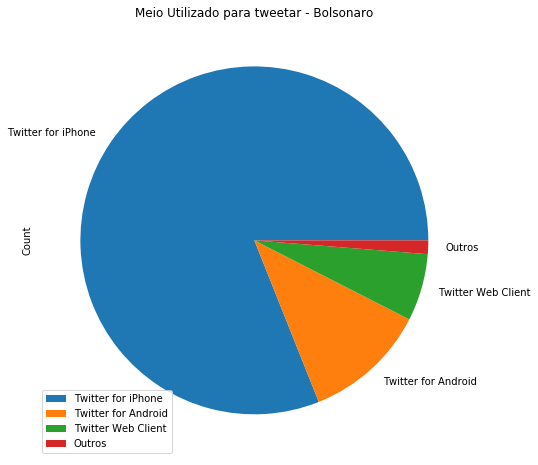

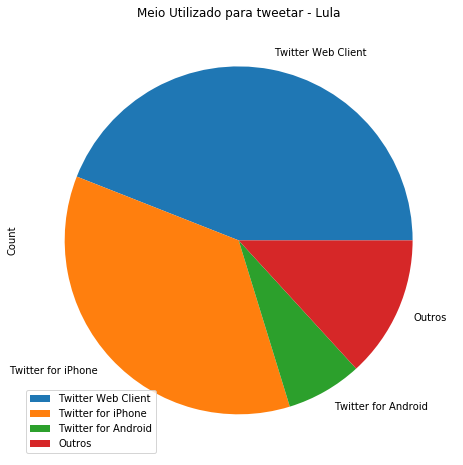

In [32]:
# Source
bolsonaro_source_df = pd.DataFrame(data=list(source_counter(bolsonaro_df['source']).items()), columns=['Source', 'Count']).sort_values(by='Count', ascending=False)
lula_source_df = pd.DataFrame(data=list(source_counter(lula_df['source']).items()), columns=['Source', 'Count']).sort_values(by='Count', ascending=False)

# Não contar os 3 primeiros
bolsonaro_others_total = bolsonaro_source_df.iloc[3:].sum()['Count']
lula_others_total = lula_source_df.iloc[3:].sum()['Count']

# Adicionar depois dos 3 primeiros, o "outros" como a soma do restante
lula_source_df = lula_source_df.iloc[:3].append(pd.DataFrame({'Source': ['Outros'], 'Count': [lula_others_total]}), ignore_index=True)
bolsonaro_source_df = bolsonaro_source_df.iloc[:3].append(pd.DataFrame({'Source': ['Outros'], 'Count': [bolsonaro_others_total]}), ignore_index=True)
bolsonaro_source_df.merge(lula_source_df)

# Gráfico pizza
bolsonaro_source_df.plot.pie(y='Count',
                             labels=bolsonaro_source_df['Source'],
                             figsize=(18, 8),
                             title='Meio Utilizado para tweetar - Bolsonaro')
plt.legend(loc='lower left')

lula_source_df.plot.pie(y='Count',
                             labels=lula_source_df['Source'],
                             figsize=(18, 8),
                             title='Meio Utilizado para tweetar - Lula')

plt.legend(loc='lower left')

## Análisando Tweets

1. Contador de frase
2. Contador de frases únicas
3. Contador de letras
4. Contador de letras úncias
5. Contador de pontuação
6. Contador de espaço
7. Contador de "stop words"
8. Contador de palavras longas (7 ou + caracteres)
9. Contador de palavras curtas (3 ou menos caracteres)

https://charactercounttool.com/

In [33]:
bolsonaro_words = bolsonaro_df['full_text']
lula_words = lula_df['full_text']

bolsonaro_df['word_count'] = words_counter(bolsonaro_words)
bolsonaro_df['unique_words_count'] = unique_words_counter(bolsonaro_words)
bolsonaro_df['letter_count'] = letter_counter(bolsonaro_words)
bolsonaro_df['unique_word_count'] = unique_words_counter(bolsonaro_words)
bolsonaro_df['unique_letter_count'] = space_counter(bolsonaro_words)
bolsonaro_df['stop_word_count'] = stop_words_counter(bolsonaro_words)
bolsonaro_df['long_word_count'] = long_words_counter(bolsonaro_words)
bolsonaro_df['short_word_count'] = short_words_counter(bolsonaro_words)

lula_df['word_count'] = words_counter(lula_words)
lula_df['unique_words_count'] = unique_words_counter(lula_words)
lula_df['letter_count'] = letter_counter(lula_words)
lula_df['unique_word_count'] = unique_words_counter(lula_words)
lula_df['unique_letter_count'] = space_counter(lula_words)
lula_df['stop_word_count'] = stop_words_counter(lula_words)
lula_df['long_word_count'] = long_words_counter(lula_words)
lula_df['short_word_count'] = short_words_counter(lula_words)

In [34]:
features = [
    'word_count',
    'unique_words_count',
    'letter_count',
    'unique_word_count',
    'unique_letter_count',
    'stop_word_count',
    'long_word_count',
    'short_word_count'
]

print("Bolsonaro")
bolsonaro_df[features].describe().T

Bolsonaro


,count,mean,std,min,25%,50%,75%,max
word_count,6794.0,20.964675,13.733577,1.0,10.0,18.0,31.0,57.0
unique_words_count,6794.0,19.390786,11.946662,1.0,10.0,17.0,28.0,52.0
letter_count,6794.0,142.975861,81.747330,1.0,81.0,128.0,205.0,332.0
unique_word_count,6794.0,19.390786,11.946662,1.0,10.0,17.0,28.0,52.0
unique_letter_count,6794.0,19.920960,13.701098,0.0,9.0,17.0,30.0,56.0
stop_word_count,6794.0,38.859729,28.856583,0.0,16.0,32.0,60.0,115.0
long_word_count,6794.0,7.617162,4.830884,0.0,4.0,7.0,11.0,22.0
short_word_count,6794.0,7.778039,5.869142,0.0,3.0,6.0,12.0,30.0


In [35]:
print("Lula")
lula_df[features].describe().T

Lula


,count,mean,std,min,25%,50%,75%,max
word_count,14961.0,20.465143,9.965844,1.0,14.0,19.0,25.0,57.0
unique_words_count,14961.0,18.855558,8.478870,1.0,13.0,18.0,23.0,47.0
letter_count,14961.0,134.053406,56.894513,11.0,100.0,128.0,147.0,304.0
unique_word_count,14961.0,18.855558,8.478870,1.0,13.0,18.0,23.0,47.0
unique_letter_count,14961.0,19.430185,9.966224,0.0,13.0,18.0,24.0,72.0
stop_word_count,14961.0,40.314016,19.520822,1.0,28.0,38.0,48.0,111.0
long_word_count,14961.0,6.415146,3.292457,0.0,4.0,6.0,8.0,21.0
short_word_count,14961.0,7.879086,4.836887,0.0,4.0,7.0,11.0,30.0


# Análise das palavras mais utilizadas (top 10)
### Levando em conta todos os tweets

In [36]:
bolsonaro_words_count = total_words_counter(bolsonaro_df['full_text'])
lula_words_count = total_words_counter(lula_df['full_text'])

bolsonaro_words_count_df = pd.DataFrame(
    data=list(bolsonaro_words_count.items()),
    columns=['Word', 'Count']
).sort_values(by=['Count'], ascending=False)[:10]

lula_words_count_df = pd.DataFrame(
    data=list(lula_words_count.items()),
    columns=['Word', 'Count']
).sort_values(by=['Count'], ascending=False)[:10]

In [37]:
print("Bolsonaro - Top 10 palavras")
bolsonaro_words_count_df

Bolsonaro - Top 10 palavras


,Word,Count
148,brasil,1255
320,bolsonaro,803
23,todos,588
56,governo,388
176,sobre,366
193,obrigado,349
22,abraço,318
303,hoje,308
935,pt,298
160,grande,287


In [38]:
print("Lula - Top 10 palavras")
lula_words_count_df

Lula - Top 10 palavras


,Word,Count
2,lula,5242
98,país,1685
207,brasil,1473
120,povo,1317
88,lulapelobrasil,1176
47,gente,924
1,presidente,921
11,haddadfernando,725
59,fazer,719
3,vai,716


Bolsonaro Nuvem de Palavras


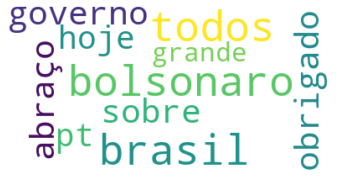



Lula Nuvem de Palavras


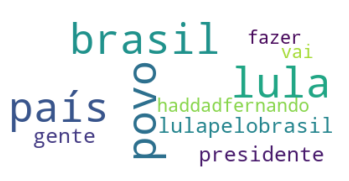

In [39]:
print("Bolsonaro Nuvem de Palavras")
generate_word_cloud(' '.join(bolsonaro_words_count_df['Word']))

print("\n")

print("Lula Nuvem de Palavras")
generate_word_cloud(' '.join(lula_words_count_df['Word']))

# FIM